In [1]:
# Dependencies and Setup
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "resources/mouse_drug_data.csv"
#clinical_trial_data_to_load = "resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_dd = pd.read_csv("Resources/mouse_drug_data.csv")
clinical_td = pd.read_csv("Resources/clinicaltrial_data.csv")

# Combine the data into a single dataset
data = pd.merge(clinical_td,mouse_dd,on="Mouse ID")

# Autolabel function for bar graphs
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')
# Display the data table for preview
data.describe() 
data.count()#data looks complete, no initially detected issues
data.head()
data.dtypes # ok for next steps but strings converted as such to avoid posterior issues
data['Mouse ID'].astype(str)
data['Drug'].astype(str)
data.head(16)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint, and # Convert to DataFrame
tum_vol_drug = data.groupby("Drug")
tum_vol_drug_mean = data.groupby("Drug").mean()
tum_vol_tpoint = data.groupby("Timepoint")
tum_vol_tpoint_mean = data.groupby("Timepoint").mean()
# Preview DataFrame with decimals fix for easier reading
tum_vol_drug_mean.style.format({'Timepoint': "{:.2f}",'Tumor Volume (mm3)': "{:.2f}",'Metastatic Sites': "{:.2f}"})

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,
Capomulin,21.57,40.68,0.71
Ceftamin,19.75,52.59,1.18
Infubinol,18.17,52.96,0.96
Ketapril,19.71,55.24,1.30
Naftisol,19.62,54.33,1.18
Placebo,18.67,54.03,1.44
Propriva,16.86,52.32,0.98
Ramicane,21.43,40.22,0.55
Stelasyn,18.92,54.11,0.85


In [3]:
#Some Tumor data slicing for analysis and other variables for later easier use
Drugs = data["Drug"].unique()
Drugs_num = len(Drugs)
datoss=data.groupby(["Timepoint", "Drug"])["Tumor Volume (mm3)"].mean()
datoss=datoss.reset_index()
datoss.head()

,Timepoint,Drug,Tumor Volume (mm3)
0,0,Capomulin,45.0
1,0,Ceftamin,45.0
2,0,Infubinol,45.0
3,0,Ketapril,45.0
4,0,Naftisol,45.0


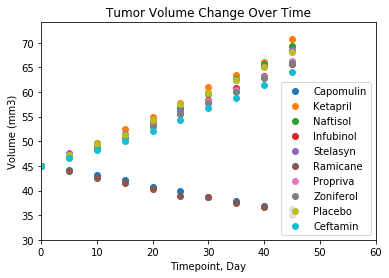

<Figure size 432x288 with 0 Axes>

In [4]:
#Tumor volume change with for-loop by slicing rows with "i" gotten from listed drugs and grouping/mean at the same time 
drugs_tum_size=[]
x_axis = tum_vol_tpoint["Timepoint"].unique()
for i in Drugs:
    w=data.loc[data["Drug"]==i,:].groupby("Timepoint").mean()["Tumor Volume (mm3)"]
    plt.scatter(x_axis,w, label = i)
    drugs_tum_size.append(w)
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xlim(0, max(x_axis+15))
plt.ylim(30,max(w+10)) #why min is not getting the right value??
plt.title("Tumor Volume Change Over Time")
plt.xlabel("Timepoint, Day")
plt.ylabel("Volume (mm3)")
plt.legend(loc="best")
#plt.legend(position="right center")
plt.show()
plt.savefig("Images/tum_vol_over_time.png")

In [5]:
print("Observable Trend 1:Regarding Tumor Volume change through treatment: only two drugs (Ramicane and Capomulin) result in reduction")
print("The rest of the drugs show no effect but, on the contrary, tumor volume increase")

Observable Trend 1:Regarding Tumor Volume change through treatment: only two drugs (Ramicane and Capomulin) result in reduction
The rest of the drugs show no effect but, on the contrary, tumor volume increase


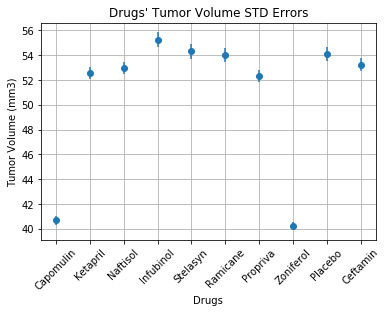

In [6]:
#Standard errors for Tumor Volume means computing and plotting
standard_errors = data.groupby("Drug").agg(stats.sem)["Tumor Volume (mm3)"]
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(Drugs, tum_vol_drug_mean["Tumor Volume (mm3)"], standard_errors, fmt="o")
#Plot data format for easier reading, axes labeling, title, legend location, etc
ax.set_ylim(40, 56,1)
ax.set_xlabel("Drugs")
plt.xticks(rotation=45)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Drugs' Tumor Volume STD Errors")
plt.autoscale()
plt.grid()
# Save the Figure
plt.savefig("Images/drugs_tum_vol_stde.png")

In [7]:
Drugsb=Drugs
Drugsb

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint and converted to Dataframe
metass=data.groupby(["Timepoint", "Drug"])["Metastatic Sites"].mean()
# Preview DataFrame
metass.head(12)

Timepoint  Drug     
0          Capomulin    0.000000
           Ceftamin     0.000000
           Infubinol    0.000000
           Ketapril     0.000000
           Naftisol     0.000000
           Placebo      0.000000
           Propriva     0.000000
           Ramicane     0.000000
           Stelasyn     0.000000
           Zoniferol    0.000000
5          Capomulin    0.160000
           Ceftamin     0.380952
Name: Metastatic Sites, dtype: float64

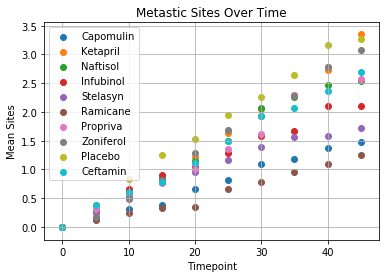

In [10]:
#Get dataframe length to utilize in loop to get actual series/plot of Metastatic Sites
s=metass.index.values.tolist()
#Metastatic sites with for-loop by slicing rows from original data with "i" gotten from listed drugs and grouping/mean at the same time 
drugs_meta=[]
x_axis = datoss["Timepoint"].unique()
for i in Drugs:
    v=data.loc[data["Drug"]==i,:].groupby("Timepoint").mean()["Metastatic Sites"]
    plt.scatter(x_axis,v, label = i)
    drugs_meta.append(v)
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xlim(0, max(x_axis+5))
plt.ylim(0,max(v+1))
plt.title("Metastic Sites Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Mean Sites")
plt.legend(loc="best")
plt.autoscale()
plt.grid()
plt.savefig("Images/metas_over_time.png")

In [11]:
print("Observable Trend 2: Regarding metastatic sites, all of the drugs present increase in the mean # of metastatic sites")
print("Ramicane, Stelasyn and Capomulin observe inferior increase in Metastatic Sites vs the rest of the Drugs")

Observable Trend 2: Regarding metastatic sites, all of the drugs present increase in the mean # of metastatic sites
Ramicane, Stelasyn and Capomulin observe inferior increase in Metastatic Sites vs the rest of the Drugs


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint # Convert to DataFrame
standard_errorsM = data.groupby("Drug").agg(stats.sem)["Metastatic Sites"]
# Preview DataFrame
standard_errorsM.head()

Drug
Capomulin    0.055981
Ceftamin     0.088766
Infubinol    0.076985
Ketapril     0.101659
Naftisol     0.089200
Name: Metastatic Sites, dtype: float64

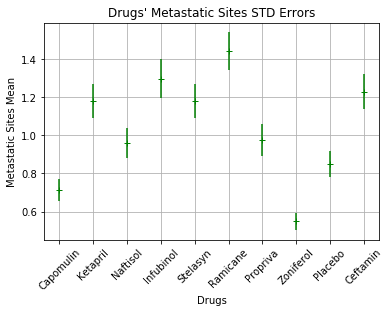

In [13]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(Drugs, tum_vol_drug_mean["Metastatic Sites"], standard_errorsM, fmt="+", color = "g")
#Plot data format for easier reading, axes labeling, title, legend location, etc
ax.set_title("Drugs' Metastatic Sites STD Errors")
ax.set_xlabel("Drugs")
ax.set_ylabel("Metastatic Sites Mean")
plt.xticks(rotation=45)
plt.grid()
# Save the Figure
plt.savefig("drugs_metastatic_stde.png")

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric "count" as mice that survived)
tum_vol_tpoint.count()
# Convert to DataFrame
tum_vol_tpoint_c = tum_vol_tpoint["Mouse ID"].count()
# Preview DataFrame
tum_vol_tpoint.count()

,Mouse ID,Tumor Volume (mm3),Metastatic Sites,Drug
Timepoint,,,,
0,252,252,252,252
5,240,240,240,240
10,225,225,225,225
15,209,209,209,209
20,197,197,197,197
25,184,184,184,184
30,172,172,172,172
35,155,155,155,155
40,142,142,142,142


In [15]:
# Preview the Data Frame
w=len(tum_vol_tpoint_c)
tum_vol_tpoint_c

Timepoint
0     252
5     240
10    225
15    209
20    197
25    184
30    172
35    155
40    142
45    130
Name: Mouse ID, dtype: int64

In [16]:
#Survival rate is calculated with a for loop that goes through the count.dF and computes with the current and prior data value
#to get an index and converting to percent value
survival_rate=[]
surv=0
zz=len(tum_vol_tpoint_c)
for i in range(zz):
    if i == 0:
        surv= tum_vol_tpoint_c[i*5]
        survival_rate.append(1.0)
    else:
        surv=tum_vol_tpoint_c[i*5]/tum_vol_tpoint_c[0]
        #print(i)
        survival_rate.append(surv)
survival_rate_c=[(x*100) for x in survival_rate]

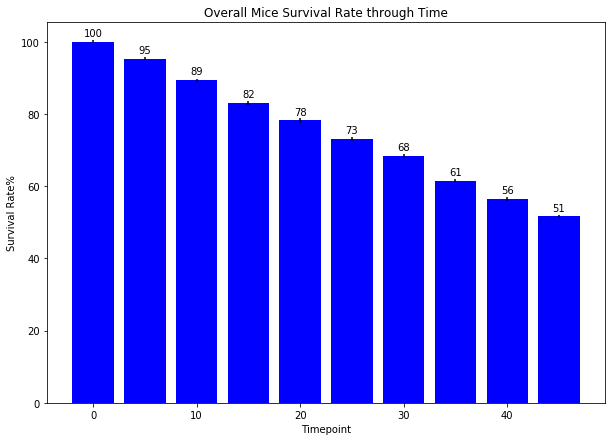

In [17]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
x_axis = tum_vol_tpoint["Timepoint"].unique()
rects = ax.bar(x_axis, survival_rate_c, width=4.0, color='b', yerr=standard_errors)
ax.get_ylim()
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.title("Overall Mice Survival Rate through Time")
plt.xlabel("Timepoint")
plt.ylabel("Survival Rate%")
#autolabel function used to print labels in the plot
autolabel(rects, ax)
# Save the Figure
plt.savefig("Images/Survival_rate.png")
fig.set_figheight(7)
fig.set_figwidth(10)
# Show the Figure
plt.show()

## Summary Bar Graph

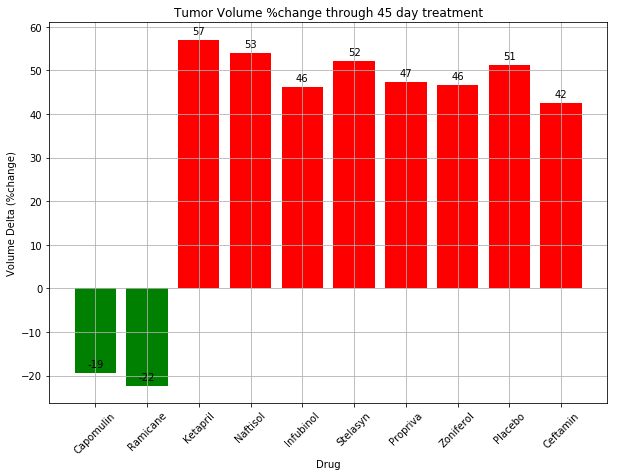

In [22]:
drug_pass=[]
drug_fail=[]
positive=[]
negative=[]
for i in Drugs:
    drug_series=data.loc[data["Drug"]==i,:].groupby("Timepoint").mean()["Tumor Volume (mm3)"]
    drug_temp=((drug_series[45]/drug_series[0])-1)*100
# Splicing the data between passing and failing drugs to list created
    if drug_temp < 1:
        drug_pass.append(drug_temp)
        positive.append(i)
    else:
        drug_fail.append(drug_temp)
        negative.append(i)
#Plotting the sliced data for pass/fail drugs
fig, ax = plt.subplots()
rects_pass = ax.bar(positive, drug_pass, color='g')
rects_fail = ax.bar(negative, drug_fail, color='r')
ax.get_ylim()
#Plot data format for easier reading, axes labeling, title, legend location, etc
plt.xticks(rotation=45)
#plt.ylim(min(drugs_size_chg)-5,max(drugs_size_chg)+5) #why min is not getting the right value??
plt.title("Tumor Volume %change through 45 day treatment")
plt.xlabel("Drug")
plt.ylabel("Volume Delta (%change)")
#autolabel function used to print labels in the plot
autolabel(rects_pass,ax)
autolabel(rects_fail,ax)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.grid()
plt.savefig("Images/pass_fail_drugs.png")
# Show the Figure
plt.show()

In [21]:
print("Observable trend 3: The % volume change in tumors in the two drug groups as pass-tumor reduction/fail-tumor increase are similar in their respective proportion")

Observable trend 3: The % volume change in tumors in the two drug groups as pass-tumor reduction/fail-tumor increase are similar in their respective proportion
